# Travailler avec des bases de données

Dans le chapitre précédent, vous avez appris à lire et à écrire des fichiers texte. Lire des fichiers journaux ou d'autres fichiers texte à partir d'un lac de données et les déplacer vers une base de données ou un entrepôt de données est une tâche courante pour les ingénieurs de données. 

Dans ce chapitre, vous utiliserez les compétences que vous avez acquises en travaillant avec des fichiers texte et apprendrez à déplacer ces données dans une base de données. Ce chapitre vous apprendra également à extraire des données de bases de données relationnelles et NoSQL. À la fin de ce chapitre, vous aurez les compétences nécessaires pour travailler avec des bases de données utilisant Python,Airflow. Il est plus que probable que la plupart de vos pipelines de données se terminent par une base de données et très probablement qu'ils commencent également par une. Avec ces compétences, vous serez en mesure de créer des pipelines de données capables d'extraire et de charger, ainsi que de démarrer et de terminer, avec des bases de données relationnelles et NoSQL.


Dans ce chapitre, nous allons aborder les sujets principaux suivants :

* Insertion et extraction de données relationnelles dans Python
* Insertion et extraction de données de base de données NoSQL dans Python
* Création de pipelines de base de données dans Airflow

## Insertion et extraction de données relationnelles en Python

Lorsque vous entendez le mot base de données, vous imaginez probablement une base de données relationnelle, c'est-à-dire une base de données composée de tables contenant des colonnes et des lignes avec des relations entre les tables ; par exemple, un système de bons de commande qui contient des informations sur les stocks, les achats et les clients. Les bases de données relationnelles existent depuis plus de 40 ans et proviennent du modèle de données relationnelles développé par E. F. Codd à la fin des années 1970. Il existe plusieurs fournisseurs de bases de données relationnelles – dont IBM, Oracle et Microsoft – mais toutes ces bases de données utilisent un dialecte similaire de SQL, qui signifie Structured Query Language. Dans ce guide, vous travaillerez avec une base de données open source populaire - PostgreSQL. Dans la section suivante, vous apprendrez à créer une base de données et des tables

## Installation et configuration de PostgreSQL

PostgreSQL est une base de données relationnelle open source. Il se compare à Oracle ou Microsoft SQL Server. PostgreSQL dispose également d'un plugin - postGIS - qui permet des capacités spatiales dans PostgreSQL. Dans ce guide, ce sera la base de données relationnelle de choix. PostgreSQL peut être installé sur Linux en tant que package :

    sudo apt-get install postgresql-11

2. Une fois l'installation des packages terminée, vous pouvez démarrer la base de données avec les éléments suivants :


    sudo pg_ctlcluster 11 main start


3. L'utilisateur par défaut, postgres, n'a pas de mot de passe. Pour en ajouter un, connectez-vous à la base de données par défaut :


    sudo -u postgres psql

4. Une fois connecté, vous pouvez modifier l'utilisateur et lui attribuer un mot de passe :


    ALTER USER postgres PASSWORD ‚postgres';

5. Pour créer une base de données, vous pouvez saisir la commande suivante :


    sudo -u postgres createdb dataengineering

L'utilisation de la ligne de commande est rapide, mais parfois, une interface graphique facilite la vie. PostgreSQL dispose d'un outil d'administration – pgAdmin 4


## L'installation de pgAdmin 4

pgAdmin 4 rendra la gestion de PostgreSQL beaucoup plus facile si vous débutez dans les bases de données relationnelles. L'interface graphique Web vous permettra de visualiser vos données et de créer visuellement des tableaux. Pour installer pgAdmin 4, procédez comme suit :

1. Vous devez ajouter le référentiel à Ubuntu. Les commandes suivantes doivent être ajoutées au référentiel :


    wget --quiet -O - https://www.postgresql.org/media/keys/ACCC4CF8.asc | sudo apt-key add -
    sudo sh -c 'echo "deb http://apt.postgresql.org/pub/repos/apt/ `lsb_release -cs`-pgdg main" >> /etc/apt/sources.list.d/pgdg.list'
    
    sudo apt update
    sudo apt install pgadmin4 pgadmin4-apache2 -y


2. Vous serez invité à saisir une adresse e-mail pour un nom d'utilisateur, puis pour un mot de passe. Vous devriez voir l'écran suivant :

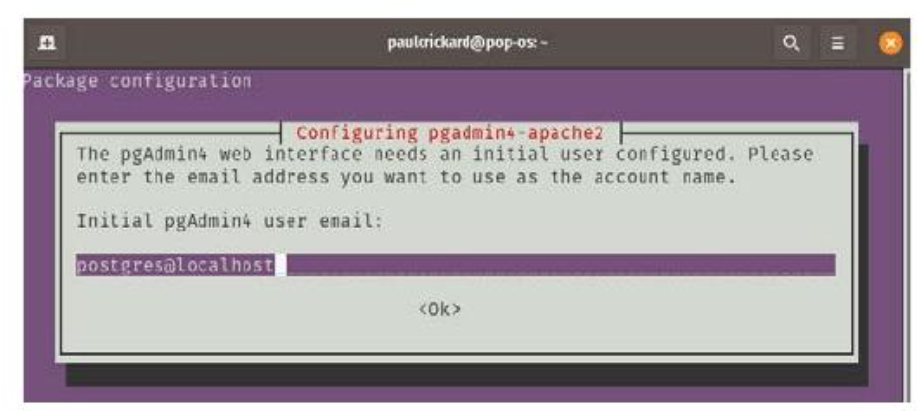

3. Une fois l'installation terminée, vous pouvez accéder à http://localhost/pgadmin4 et l'écran de connexion s'affichera, comme illustré dans la capture d'écran suivante. Saisissez les informations d'identification de l'utilisateur que vous venez de créer lors de l'installation :

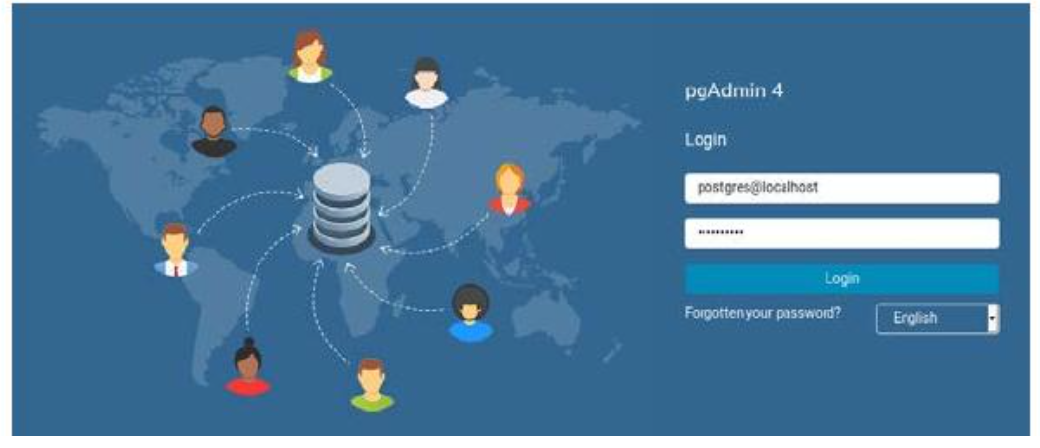

Une fois connecté, vous pouvez gérer vos bases de données à partir de l'interface graphique. La section suivante vous donnera un bref aperçu de pgAdmin 4.

## Visite guidée de pgAdmin 4

Après vous être connecté à pgAdmin 4, vous verrez un tableau de bord avec une icône de serveur sur le côté gauche. Il n'y a actuellement aucun serveur configuré, vous voudrez donc ajouter le serveur que vous avez installé plus tôt dans ce chapitre.

Cliquez sur l'icône Add new serversur le tableau de bord. Vous verrez une fenêtre pop-up. Ajoutez les informations de votre instance PostgreSQL, comme illustré dans la capture d'écran suivante :

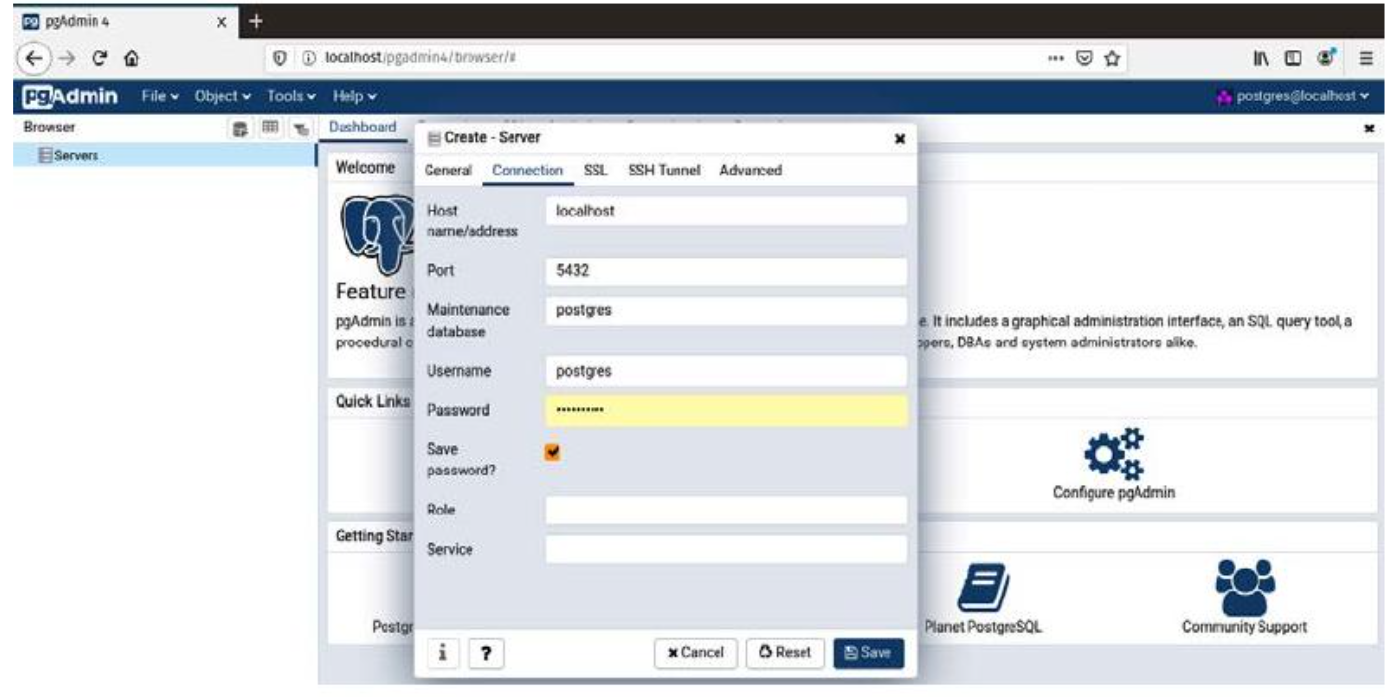

Une fois que vous avez ajouté le serveur, vous pouvez développer l'icône du serveur et vous devriez voir la base de données que vous avez créée précédemment - l'ingénierie des données. Développez la base de données d'ingénierie des données, puis les schémas, puis le public. Vous pourrez cliquer avec le bouton droit sur Tables pour ajouter une table à la base de données, comme illustré dans la capture d'écran suivante :

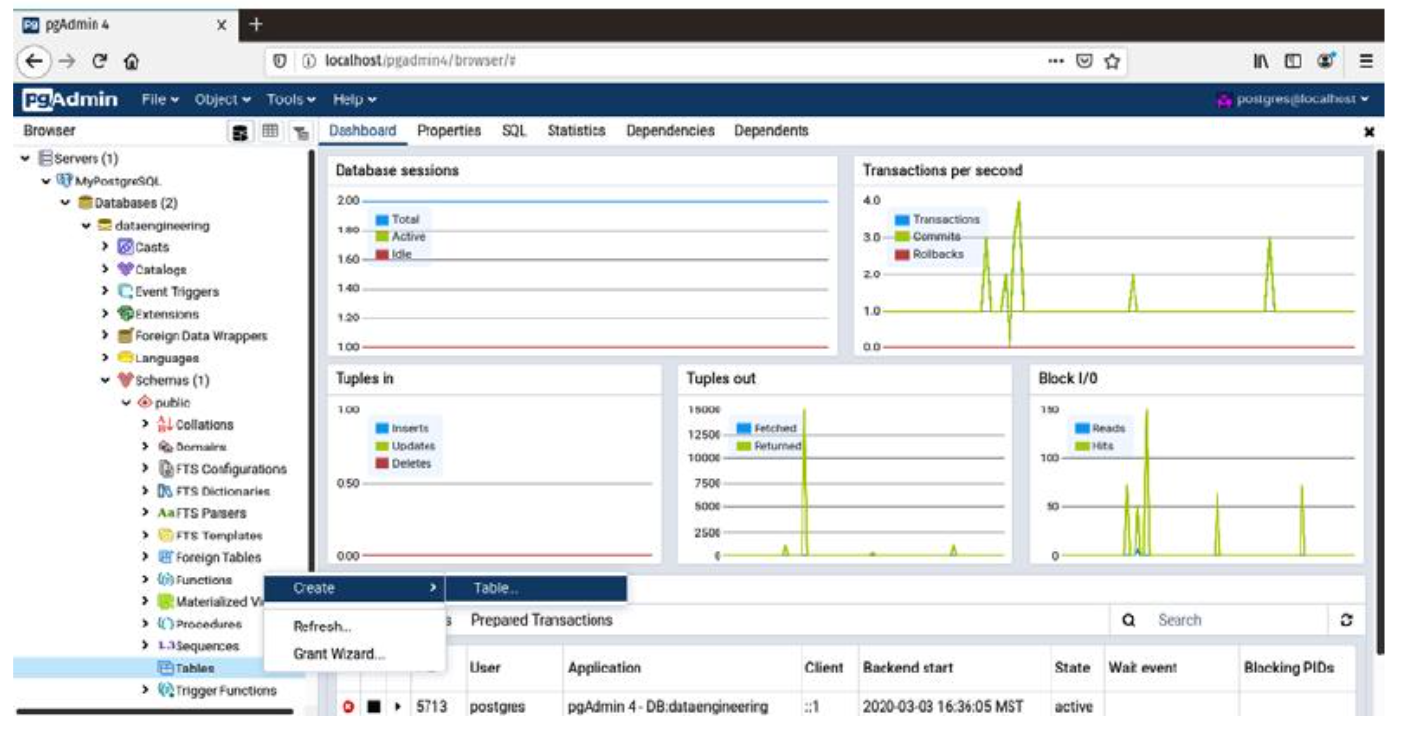

Pour remplir la table avec des données, nommez la table, puis sélectionnez l'onglet Colonnes. Créez un tableau avec des informations sur les personnes. Le tableau est présenté dans la capture d'écran suivante :

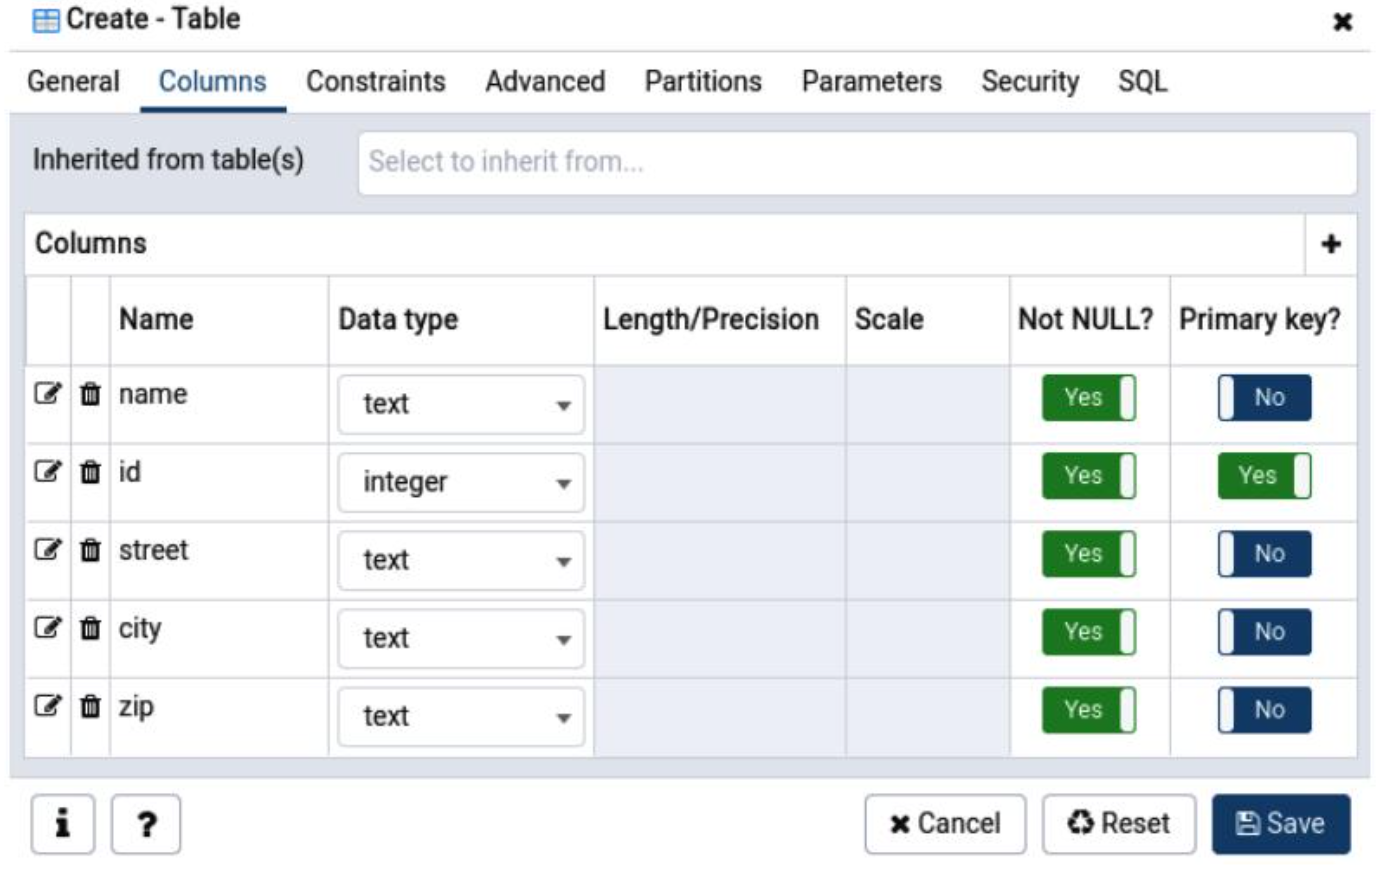

## Création d'une base de données et de tables PostgreSQL 

Dans le section précidente, vous avez créé une base de données dans PostgreSQL à l'aide de pgAdmin 4. La base de données s'appelait dataengineering et vous avez créé une table nommée utilisateurs avec des colonnes pour le nom, la rue, la ville, le code postal et IDENTIFIANT. La base de données est illustrée dans la capture d'écran suivante :

Si vous avez créé la base de données, vous pouvez ignorer cette section, mais si vous ne le faites pas, cette section vous guidera rapidement tout au long de la création d'une base de données. Pour créer une base de données dans PostgreSQL avec pgAdmin 4, procédez comme suit :


1. Accédez à http://localhost/pgadmin4 et connectez-vous en utilisant le compte que vous avez créé lors de l'installation de pgAdmin

2. Développez l'icône du serveur dans le volet Navigateur. Cliquez avec le bouton droit sur l'icône MyPostgreSQL et sélectionnez Créer | Base de données.

3. Nommez la base de données dataengineering. Vous pouvez laisser l'utilisateur postgres.

4. Développez l'icône d'ingénierie des données, puis développez Schémas, puis public, puis Tables. Cliquez avec le bouton droit sur Tables, puis cliquez sur Créer | Tableau.

5. Nommez les utilisateurs de la table. Cliquez sur l'onglet Colonnes, puis, à l'aide du signe plus à droite, créez des colonnes correspondant à la capture d'écran précédente de la base de données. Les noms et types de colonnes seront les suivants : 

a) nom : texte

b) id : entier

c) rue : texte

d) ville : texte) 
zip : texte 

Vous avez maintenant une base de données et une table créées dans PostgreSQL et pouvez charger des données en utilisant Python . Vous remplirez le tableau dans la section suivante.

## Insertion de données dans PostgreSQL

Il existe plusieurs bibliothèques et moyens de se connecter à une base de données en Python – pyodbc, sqlalchemy, psycopg2, et en utilisant une API et des requêtes. Dans ce guide, nous utiliserons la bibliothèque psycopg2 pour nous connecter à PostgreSQL car elle est spécialement conçue pour se connecter à PostgreSQL. Au fur et à mesure que vos compétences progressent, vous souhaiterez peut-être vous pencher sur des outils tels que SQLAlchemy. SQLAlchemy est une boîte à outils et un mappeur objet-relationnel pour Python. Il vous permet d'effectuer des requêtes de manière plus pythonique - sans SQL - et de mapper des classes Python sur des tables de base de données.

## Installation de psycopg2

Vous pouvez vérifier si psycopg2 est installé en exécutant la commande suivante


    python3 -c "import psycopg2; print(psycopg2.__version__)"

La commande précédente exécute python3 avec la commande flag. Le drapeau indique à Python d'exécuter les commandes en tant que programme Python. Le texte cité importe psycopg2 puis imprime la version. Si vous recevez une erreur, il n'est pas installé. Vous devriez voir une version telle que 2.8.4 suivie d'un texte entre parenthèses. La bibliothèque doit avoir été installée lors de l'installation d'Apache Airflow. Si elle n'est pas installée, vous pouvez l'ajouter avec la commande suivante


    pip3 install psycopg2


L'utilisation de pip nécessite la présence de dépendances supplémentaires pour que cela fonctionne. Si vous rencontrez des problèmes, vous pouvez également installer une version binaire précompilée à l'aide de la commande suivante :


      pip3 install psycopg2-binary


L'une de ces deux méthodes installera la bibliothèque et nous préparera à commencer la section suivante.

## se connecter à PostgreSQL avec Python

Pour vous connecter à votre base de données à l'aide de psycopg2, vous devrez créer une connexion, créer un curseur, exécuter une commande et obtenir les résultats. Vous suivrez ces mêmes étapes, que vous interrogeiez ou insériez des données. Parcourons les étapes comme suit : 

1. Importez la bibliothèque et référencez-la en tant que db :


    import psycopg2 as db

2. Créez une chaîne de connexion contenant l'hôte, la base de données, le nom d'utilisateur et le mot de passe :


    conn_string="dbname='dataengineering' host='localhost' user='postgres' password='postgres'"

3. Créez l'objet de connexion en passant la chaîne de connexion à la méthode connect()


    conn=db.connect(conn_string)


4. Ensuite, créez le curseur à partir de la connexion :


    cur=conn.cursor()


Vous êtes maintenant connecté à la base de données. À partir de là, vous pouvez émettre n'importe quelle commande SQL. Dans la section suivante, vous apprendrez comment insérer des données dans PostgreSQL


## Insertion de données

Maintenant que vous avez une connexion ouverte, vous pouvez insérer des données à l'aide de SQL. Pour insérer une seule personne, vous devez formater une instruction d'insertion SQL, comme indiqué :



      query = "insert into users (id,name,street,city,zip) values({},'{}','{}','{}','{}')"\
        .format(1,'Big Bird','Sesame Street','Fakeville','12345')



Pour voir à quoi ressemblera cette requête, vous pouvez utiliser la méthode mogrify().


    Qu'est-ce que mogrify ? 
    
    Selon la documentation psycopg2, la méthode mogrify renverra une chaîne de
    requête après la liaison des arguments. La chaîne renvoyée est exactement
    celle qui serait envoyée à la base de données exécutant la méthode execut()
    ou similaire. En bref, il renvoie la requête formatée. Ceci est utile car
    vous pouvez voir ce que vous envoyez à la base de données, car votre
    requête SQL peut souvent être une source d'erreurs.


Transmettez votre requête à la méthode mogrify :


    cur.mogrify(query)




Le code précédent créera une instruction d'insertion SQL appropriée ; cependant, au fur et à mesure de votre progression, vous ajouterez plusieurs enregistrements dans une seule instruction. Pour ce faire, vous allez créer un tuple de tuples. Pour créer la même instruction SQL, vous pouvez utiliser le code suivant :


    query2 = "insert into users (id,name,street,city,zip) values(%s,%s,%s,%s,%s)"
    data=(1,'Big Bird','Sesame Street','Fakeville','12345')


Notez que dans la requête2, vous n'aviez pas besoin d'ajouter des guillemets autour des chaînes qui seraient transmises comme vous l'avez fait dans la requête lorsque vous avez utilisé {}. En utilisant le formatage précédent, psycopg2 gérera le mappage des types dans la chaîne de requête. Pour voir à quoi ressemblera la requête lorsque vous l'exécuterez, vous pouvez utiliser mogrify et transmettre les données avec la requête :


    cur.mogrify(query2,data)



Les résultats de mogrify sur la requête et la requête2 doivent être identiques. Maintenant, vous pouvez exécuter la requête pour l'ajouter à la base de données


    cur.execute(query2,data)



Si vous revenez à pgAdmin 4, faites un clic droit sur la table des utilisateurs, puis sélectionnez Afficher/Modifier les données | Toutes les lignes, vous pouvez voir qu'aucune donnée n'a été ajoutée à la table. Pourquoi donc? Le code a échoué ? Il n'a pas. 

Lorsque vous exécutez une instruction qui modifie la base de données, telle qu'une instruction insert, vous devez la rendre permanente en validant la transaction à l'aide du code suivant :


    conn.commit()


Maintenant, dans pgAdmin 4, vous devriez pouvoir voir l'enregistrement, comme indiqué dans la capture d'écran suivante :

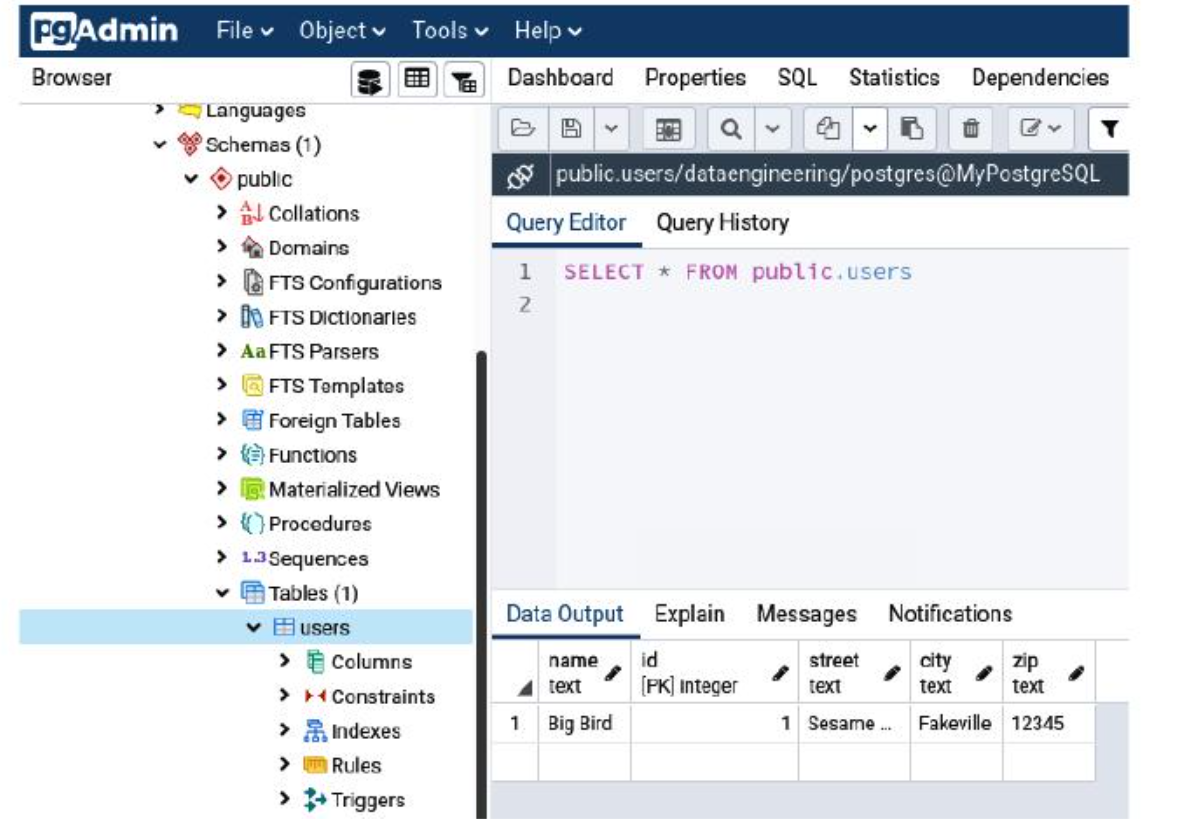


L'enregistrement est maintenant ajouté à la base de données et visible dans pgAdmin 4. Maintenant que vous avez entré un seul enregistrement, la section suivante vous montrera comment saisir plusieurs enregistrements

## Insertion de plusieurs enregistrements 

Pour insérer plusieurs enregistrements, vous pouvez parcourir les données en boucle et utiliser le même code indiqué dans la section précédente, mais cela nécessiterait une transaction par enregistrement dans la base de données. Un meilleur moyen serait d'utiliser une seule transaction et d'envoyer toutes les données, laissant psycopg2 gérer l'insertion en masse.

 Vous pouvez y parvenir en utilisant la méthode executemany. Le code suivant utilisera Faker pour créer les enregistrements, puis exécuteramany() pour les insérer:
 
 
 1. Importez les bibliothèques nécessaires :


    import psycopg2 as db
    from faker import Faker


2. Créez l'objet faker et un tableau pour contenir toutes les données. Vous initialiserez une variable, i, pour contenir un ID :


    fake=Faker()
    data=[]
    i=2


3. Maintenant, vous pouvez rechercher, itérer et ajouter un faux tuple au tableau que vous avez créé à l'étape précédente. Incrémentez i pour l'enregistrement suivant. N'oubliez pas que dans la section précédente, vous avez créé un enregistrement pour Big Bird avec un ID de 1. C'est pourquoi vous commencerez par 2 dans cet exemple. Nous ne pouvons pas avoir la même clé primaire dans la table de base de données :



    for r in range(1000):    
      data.append((i,fake.name(),fake.street_address(),               
          fake.city(),fake.zipcode()))    
      i+=1

4. Convertissez le tableau en un tuple de tuples :

    data_for_db=tuple(data)

5. Maintenant, vous revenez au code psycopg, qui sera similaire à l'exemple de la section précédente :



    conn_string="dbname='dataengineering' host='localhost' user='postgres' password='postgres'"
    
    conn=db.connect(conn_string)
    cur=conn.cursor()
    query = "insert into users (id,name,street,city,zip) values(%s,%s,%s,%s,%s)"

6. Vous pouvez imprimer ce que le code enverra à la base de données en utilisant un seul enregistrement de la variable data_for_db :


    print(cur.mogrify(query,data_for_db[1]))


7. Enfin, utilisez executemany() au lieu de execute() pour laisser la bibliothèque gérer les insertions multiples. Ensuite, validez la transaction :


    cur.executemany(query,data_for_db)
    conn.commit()


Maintenant, vous pouvez regarder pgAdmin 4 et voir les 1 000 enregistrements. Vous aurez des données.

Votre table devrait maintenant avoir 1 001 enregistrements. Maintenant que vous pouvez insérer des données dans PostgreSQL, la section suivante vous montrera comment les interroger en Python.

## Extraire des données de PostgreSQL

L'extraction de données à l'aide de psycopgs suit exactement la même procédure que l'insertion, la seule différence étant que vous utiliserez une instruction select au lieu d'insert. Les étapes suivantes vous montrent comment extraire des données:

    1. Importez la bibliothèque, puis configurez votre connexion et votre curseur :



      import psycopg2 as db
      
      conn_string="dbname='dataengineering' host='localhost' user='postgres' password='postgres'"
      
      conn=db.connect(conn_string)
      cur=conn.cursor()


2. Maintenant, vous pouvez exécuter une requête. Dans cet exemple, vous sélectionnerez tous les enregistrements de la table des utilisateurs :


    query = "select * from users"
    cur.execute(query)

3. Maintenant, vous avez un objet itérable avec les résultats. Vous pouvez itérer sur le curseur, comme indiqué :


    for record in cur:    
      print(record)



4. Vous pouvez également utiliser l'une des méthodes fetch :


    cur.fetchall()
    cur.fetchmany(howmany)  
    
    # where howmany equals the number of records you want returned 
    cur.fetchone()

5. Pour récupérer un seul enregistrement, vous pouvez l'affecter à une variable et l'examiner. Notez que même lorsque vous sélectionnez un enregistrement, le curseur renvoie un tableau :


    data=cur.fetchone()
    print(data[0])


6. Que vous en récupériez un ou plusieurs, vous devez savoir où vous êtes et combien d'enregistrements il y a. Vous pouvez obtenir le nombre de lignes de la requête à l'aide du code suivant :


    cur.rowcount

7. Vous pouvez obtenir le numéro de ligne actuel en utilisant rownumber. Si vous utilisez fetchone() puis appelez à nouveau rownumber, il devrait s'incrémenter avec votre nouvelle position :

    cur.rownumber

La dernière chose à mentionner est que vous pouvez également interroger une table et l'écrire dans un fichier CSV en utilisant la méthode copy_to().


8. Créez la connexion et le curseur :

    conn=db.connect(conn_string)
    cur=conn.cursor()

9. Ouvrez un fichier dans lequel écrire la table :

    f=open('fromdb.csv','w')

10. Ensuite, appelez copy_to et transmettez le fichier, le nom de la table et le séparateur (qui seront par défaut des tabulations si vous ne l'incluez pas). Fermez le fichier et vous aurez toutes les lignes au format CSV :


    cur.copy_to(f,'users',sep=',')
    f.close()


  


## Extraction de données avec DataFrames

Vous pouvez également interroger des données à l'aide de pandas DataFrames. Pour ce faire, vous devez établir une connexion à l'aide de psycopg2, puis vous pouvez ignorer le curseur et accéder directement à la requête. Les DataFrames vous donnent beaucoup de puissance pour filtrer, analyser et transformer les données. Les étapes suivantes vous guideront tout au long de l'utilisation des DataFrames :


1. Configurez la connexion :


      import psycopg2 as db
      import pandas as pd
      
      conn_string="dbname='dataengineering' host='localhost' user='postgres' password='postgres'"
      
      conn=db.connect(conn_string)

2. Maintenant, vous pouvez exécuter la requête dans un DataFrame en utilisant la méthode pandas read_sql(). La méthode prend une requête et une connexion :


    df=pd.read_sql("select * from users", conn)

3. Le résultat est un DataFrame, df, avec la table complète des utilisateurs. Vous avez maintenant un accès complet à tous les outils DataFrame pour travailler avec les données - par exemple, vous pouvez l'exporter au format JSON à l'aide du code suivant :


    df.to_json(orient='records')

Maintenant que vous savez comment utiliser les données d'une base de données relationnelle, il est temps de vous familiariser avec les bases de données NoSQL. La section suivante vous montrera comment utiliser Python avec Elasticsearch

## L'insertion et l'extraction de données de base de données NoSQL 

dans les bases de données PythonRelational peuvent être ce à quoi vous pensez lorsque vous entendez le terme base de données, mais il existe plusieurs autres types de bases de données, telles que les bases de données en colonnes, les valeurs-clés et les séries temporelles. Dans cette section, vous apprendrez à travailler avec Elasticsearch, qui est une base de données NoSQL. NoSQL est un terme générique désignant les bases de données qui ne stockent pas de données dans des lignes et des colonnes. Les bases de données NoSQL stockent souvent leurs données sous forme de documents JSON et utilisent un langage de requête autre que SQL. La section suivante vous apprendra comment charger des données dans Elasticsearch.




## Installation d'Elasticsearch

Pour installer la bibliothèque Elasticsearch, vous pouvez utiliser pip3, comme indiqué :


      pip3 install elasticsearch

L'utilisation de pip installera la version la plus récente qui, si vous avez installé Elasticsearch conformément aux instructions du chapitre 2, Construire notre infrastructure d'ingénierie de données, est ce dont vous aurez besoin. Vous pouvez obtenir la bibliothèque pour les versions 2, 5, 6 et 7 d'Elasticsearch. Pour vérifier l'installation et vérifier la version, vous pouvez utiliser le code suivant :


    import elasticsearch
    
    elasticsearch.__version__

Le code précédent doit imprimer quelque chose comme ce qui suit : (7.6.0) Si vous avez la bonne version pour votre version d'Elasticsearch, vous êtes prêt à commencer à importer des données.

## Insertion de données dans Elasticsearch

Avant de pouvoir interroger Elasticsearch, vous devrez charger des données dans un index. Dans la section précédente, vous avez utilisé une bibliothèque, psycopg2, pour accéder à PostgreSQL. Pour accéder à Elasticsearch, vous utiliserez la bibliothèque elasticsearch. Pour charger des données, vous devez créer la connexion, puis vous pouvez émettre des commandes vers Elasticsearch. Suivez les étapes indiquées pour ajouter un enregistrement à Elasticsearch:


1. Importez les bibliothèques. Vous pouvez également créer l'objet Faker pour générer des données aléatoires :


      from elasticsearch import Elasticsearch
      from faker import Faker
      
      fake=Faker()

2. Créez une connexion à Elasticsearch 

    es = Elasticsearch()

3. Le code précédent suppose que votre instance Elasticsearch s'exécute sur localhost. Si ce n'est pas le cas, vous pouvez spécifier l'adresse IP, comme indiqué :


      es=Elasticsearch({'127.0.0.1'})

Maintenant, vous pouvez émettre des commandes sur votre instance Elasticsearch. La méthode d'indexation vous permettra d'ajouter des données. La méthode prend un nom d'index, le type de document et un corps. Le corps est ce qui est envoyé à Elasticsearch et est un objet JSON. Le code suivant crée un objet JSON à ajouter à la base de données, puis utilise index pour l'envoyer à l'index des utilisateurs (qui sera créé automatiquement lors de l'opération d'indexation) :



    doc={"name": fake.name(),"street": fake.street_address(), "city": fake.city(),"zip":fake.zipcode()}
    
    res=es.index(index="users", doc_type="doc", body=doc)
    print(res['result']) #created


Le code précédent doit imprimer le mot créé sur la console, ce qui signifie que le document a été ajouté. Elasticsearch renvoie un objet avec une clé de résultat qui vous permettra de savoir si l'opération a échoué ou réussi. créé, dans ce cas, signifie que l'opération d'indexation a réussi et a créé le document dans l'index. Tout comme avec l'exemple PostgreSQL plus tôt dans ce chapitre, vous pouvez itérer et exécuter la commande index, ou vous pouvez utiliser une opération en bloc pour laisser la bibliothèque gérer toutes les insertions pour vous.

## Insertion de données à l'aide de  helpers

En utilisant la méthode bulk , vous pouvez insérer plusieurs documents à la fois. Le processus est similaire à l'insertion d'un seul enregistrement, sauf que vous générerez toutes les données, puis les insérerez. Les étapes sont les suivantes :

1. Vous devez importer la bibliothèque helpers  pour accéder à la méthode bulk :

    
    from elasticsearch import helpers


2. Les données doivent être un tableau d'objets JSON. Dans l'exemple précédent, vous avez créé un objet JSON avec des attributs. Dans cet exemple, l'objet doit avoir des informations supplémentaires. Vous devez spécifier l'index et le type. Les traits de soulignement dans les noms sont utilisés pour les champs Elasticsearch. Le champ _source est l'endroit où vous placeriez le document JSON que vous souhaitez insérer dans la base de données. En dehors du JSON se trouve une boucle for. Cette boucle crée les 999 (vous en avez déjà ajouté un et vous indexez de 0 à 998) documents :



    actions = [
      {
        "_index": "users",
        "_type": "doc",
        "_source": {
      "name": fake.name(),
      "street": fake.street_address(), 
      "city": fake.city(),
      "zip":fake.zipcode()}
      }
      for x in range(998) # or for i,r in df.iterrows()
    ]


3. Maintenant, vous pouvez appeler la méthode bulk et lui transmettre l'instance Elasticsearch et le tableau de données. Vous pouvez imprimer les résultats pour vérifier que cela a fonctionné :


      res = helpers.bulk(es, actions)
      print(res['result'])


Vous devriez maintenant avoir 1 000 enregistrements dans un index Elasticsearch nommé users. Nous pouvons le vérifier dans Kibana. Pour ajouter le nouvel index à Kibana, accédez à votre tableau de bord Kibana à l'adresse http://localhost:5601. En sélectionnant Management  en bas à gauche de la barre d'outils, vous pouvez ensuite créer un modèle d'index en cliquant sur le bouton bleu + Create index pattern, comme illustré dans la capture d'écran suivante :

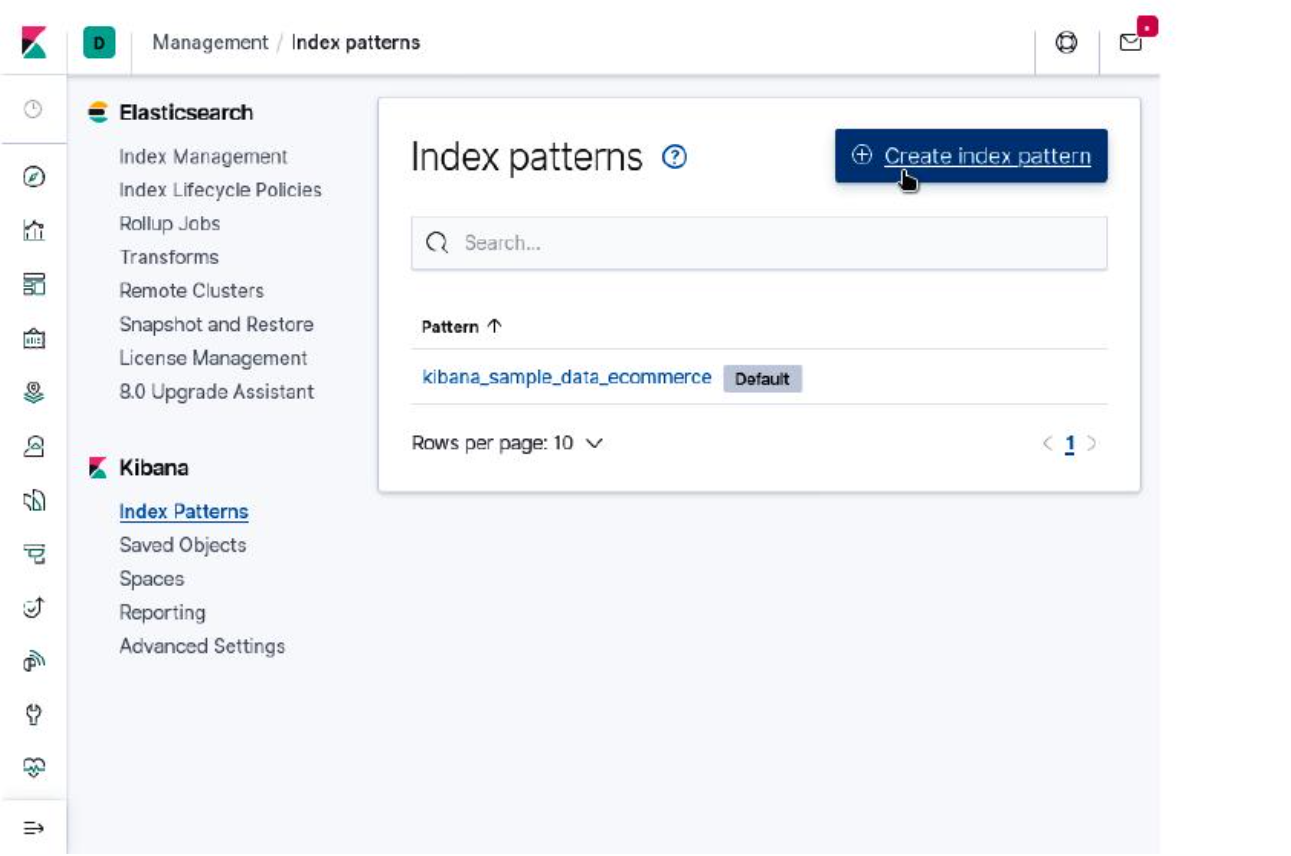


Ajoutez un modèle d'index Elasticsearch à Kibana. Sur l'écran suivant, entrez le nom de l'index - users. Kibana commencera la correspondance de modèle pour trouver l'index. Sélectionnez l'index des usres dans la liste déroulante et cliquez sur le bouton Create Index Pattern. Les mappages et les détails du nouvel index vous seront présentés. Dans la barre d'outils Kibana, sélectionnez Discover, qui est l'icône la plus haute. Dans la liste déroulante, sélectionnez votre nouvel index (users), comme indiqué dans la capture d'écran suivante ; vous devriez voir vos documents :

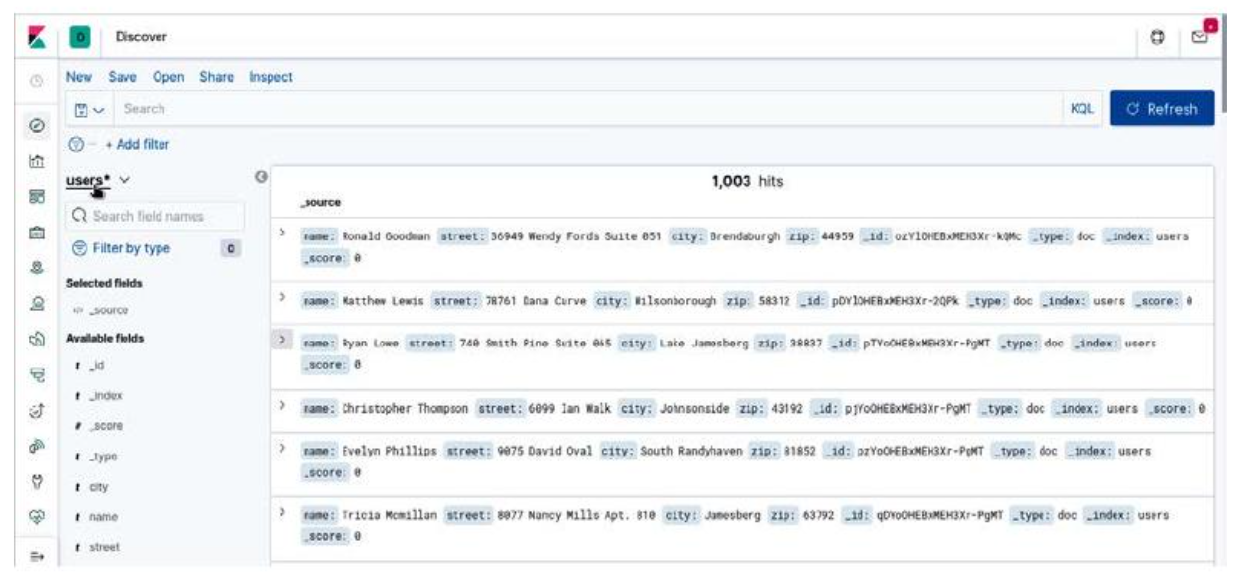

Maintenant que vous pouvez créer un enregistrement individuellement ou en utilisant la méthode bulk , la section suivante vous apprendra comment vous pouvez interroger vos données


## Interrogation d'Elasticsearch. 

L'interrogation d'Elasticsearch suit exactement les mêmes étapes que l'insertion de données. La seule différence est que vous utilisez une méthode différente – la recherche – pour envoyer un objet corps différent. Parcourons une requête simple sur toutes les données : 

1. Importez la bibliothèque et créez votre instance elasticsearch :


    from elasticsearch import Elasticsearch
    es = Elasticsearch()


2. Créez l'objet JSON à envoyer à Elasticsearch. L'objet est une requête, utilisant la recherche match_all :


    doc={"query":{"match_all":{}}}

3. Transmettez l'objet à Elasticsearch à l'aide de la méthode de search . Passer l'index et la taille de retour. Dans ce cas, vous ne retournerez que 10 enregistrements. La taille de retour maximale est de 10 000 documents :


    res=es.search(index="users",body=doc,size=10)

4. Enfin, vous pouvez imprimer les documents :


    print(res['hits']['hits'])


Ou vous pouvez itérer en saisissant _source uniquement :


    for doc in res['hits']['hits']:    
      print(doc['_source'])


Vous pouvez charger les résultats de la requête dans un DataFrame pandas - il s'agit de JSON, et vous avez appris à lire JSON au chapitre 3, Lecture et écriture de fichiers. Pour charger les résultats dans un DataFrame, importez json_normalize à partir de la bibliothèque pandas json et utilisez-le (json_normalize) sur les résultats JSON, comme indiqué dans le code suivant



    from pandas.io.json import json_normalize
    
    df=json_normalize(res['hits']['hits'])


Vous aurez maintenant les résultats de la recherche dans un DataFrame. Dans cet exemple, vous venez de récupérer tous les enregistrements, mais d'autres requêtes sont disponibles en plus de match_all. En utilisant la requête match_all, je sais que j'ai un document avec le nom Ronald Goodman. Vous pouvez interroger sur un champ en utilisant la requête de correspondance :



      doc={"query":{"match":{"name":"Ronald Goodman"}}}

      res=es.search(index="users",body=doc,size=10)
      
      print(res['hits']['hits'][0]['_source'])


Vous pouvez également utiliser une syntaxe Lucene pour les requêtes. Dans Lucene, vous pouvez spécifier field:value. Lorsque vous effectuez ce type de recherche, vous n'avez pas besoin d'envoyer un document. Vous pouvez passer le paramètre q à la méthode de recherche :


      res=es.search(index="users",q="name:Ronald Goodman",size=10)
      print(res['hits']['hits'][0]['_source'])


En utilisant le champ City, vous pouvez rechercher Jamesberg. Il rapportera deux records : un pour Jamesberg et un pour Lake Jamesberg. Elasticsearch va tokeniser les chaînes avec des espaces, les divisant en plusieurs chaînes à rechercher


      # Get City Jamesberg - Returns Jamesberg and Lake James
      
      bergdoc={"query":{"match":{"city":"Jamesberg"}}}
      
      res=es.search(index="users",body=doc,size=10)
      
      print(res['hits']['hits'])


Les résultats sont les deux enregistrements dans le bloc de code suivant :





      [
        {
          '_index': 'users', '_type': 'doc', '_id': 'qDYoOHEBxMEH3Xr-PgMT',
          '_score': 6.929674, '_source': {'name': 'Tricia Mcmillan', 'street':
          '8077 Nancy #Mills Apt. 810', 'city': 'Jamesberg', 'zip': '63792'}
        },
        {
            '_index': 'users', '_type': 'doc', '_id': 'pTYoOHEBxMEH3Xr-PgMT',
            '_score': 5.261652, '_source': {'name': 'Ryan Lowe', 'street': '740 Smith
            Pine Suite 065', 'city': 'Lake Jamesberg', 'zip': '38837'}
        }
      ]


Vous pouvez utiliser des requêtes booléennes pour spécifier plusieurs critères de recherche. Par exemple, vous pouvez utiliser must, must not et should avant vos requêtes. À l'aide d'une requête booléenne, vous pouvez filtrer le lac Jamesberg. En utilisant une correspondance obligatoire sur Jamesberg comme ville (qui renverra deux enregistrements) et en ajoutant un filtre sur le ZIP, vous pouvez vous assurer que seul Jamesberg avec le ZIP 63792 est renvoyé. Vous pouvez également utiliser une requête incontournable sur le ZIP du lac Jameson :




    # Get Jamesberg and filter on zip so Lake Jamesberg is removed
    
    doc={"query":{"bool":{"must":{"match":{"city":"Jamesberg"}},"filter":{"term":{"zip":"63792"}}}}}
    
    res=es.search(index="users",body=doc,size=10)print(res['hits']['hits'])


Maintenant, vous n'obtenez que l'enregistrement unique que vous vouliez :



    [{'_index': 'users', '_type': 'doc', '_id': 'qDYoOHEBxMEH3Xr-PgMT'
    , '_score': 6.929674, '_source': {'name': 'Tricia Mcmillan', 'street':
    '8077 Nancy #Mills Apt. 810', 'city': 'Jamesberg', 'zip': '63792'}}]


Vos requêtes n'ont renvoyé que quelques documents, mais en production, vous aurez probablement des requêtes volumineuses avec des dizaines de milliers de documents renvoyés. La section suivante vous montrera comment gérer toutes ces données.







  



## Utiliser le défilement pour gérer des résultats plus importants

 Dans le premier exemple, vous avez utilisé une taille de 10 pour votre recherche. Vous auriez pu récupérer les 1 000 enregistrements, mais que faites-vous lorsque vous en avez plus de 10 000 et que vous avez besoin de tous ? Elasticsearch a une méthode de défilement qui vous permettra de parcourir les résultats jusqu'à ce que vous les obteniez tous. Pour faire défiler les données, suivez les étapes indiquées :


1. Importez la bibliothèque et créez votre instance Elasticsearch :


    from elasticsearch import Elasticsearch
    es = Elasticsearch()


2. Recherchez vos données. Comme vous n'avez pas plus de 10 000 enregistrements, vous définirez la taille sur 500. Cela signifie qu'il vous manquera 500 enregistrements dans votre recherche initiale. Vous passerez un nouveau paramètre à la méthode de recherche – scroll. Ce paramètre spécifie la durée pendant laquelle vous souhaitez rendre les résultats disponibles. J'utilise 20 millisecondes. Ajustez ce nombre pour vous assurer d'avoir suffisamment de temps pour obtenir les données - cela dépendra de la taille du document et de la vitesse du réseau :



      res = es.search(  
        index = 'users',  
        doc_type = 'doc',  
        scroll = '20m',  
        size = 500,  
        body = {"query":{"match_all":{}}})


3. Les résultats incluront _scroll_id, que vous devrez transmettre à la méthode de défilement plus tard. Enregistrez l'ID de défilement et la taille du jeu de résultats :


    sid = res['_scroll_id']
    size = res['hits']['total']['value']


4. Pour commencer le défilement, utilisez une boucle while pour obtenir des enregistrements jusqu'à ce que la taille soit 0, ce qui signifie qu'il n'y a plus de données. À l'intérieur de la boucle, vous appellerez la méthode de défilement et passerez _scroll_id et combien de temps pour faire défiler. Cela récupérera davantage de résultats de la requête d'origine :


    while (size > 0):    
      res = es.scroll(scroll_id = sid, scroll = '20m')

6. Enfin, vous pouvez faire quelque chose avec les résultats des parchemins. Dans le code suivant, vous imprimerez la source de chaque enregistrement :


    for doc in res['hits']['hits']:        
      print(doc['_source'])

  
Vous savez maintenant comment créer des documents dans Elasticsearch et comment les interroger, même lorsqu'il y a plus que la valeur de retour maximale de 10 000. Vous pouvez faire la même chose en utilisant des bases de données relationnelles. Il est maintenant temps de commencer à utiliser ces compétences pour créer des pipelines de données. la section suivante vous apprendront comment utiliser des bases de données dans vos pipelines de données à l'aide d'Apache Airflow

## Construction de pipelines de données dans Apache AirflowDans le chapitre précédent, vous avez construit votre premier pipeline de données Airflow à l'aide d'un opérateur Bash et Python. Cette fois, vous combinerez deux opérateurs Python pour extraire les données de PostgreSQL, les enregistrer en tant que fichier CSV, puis les lire et les écrire dans un index Elasticsearch. Le pipeline complet est illustré dans la capture d'écran suivante :


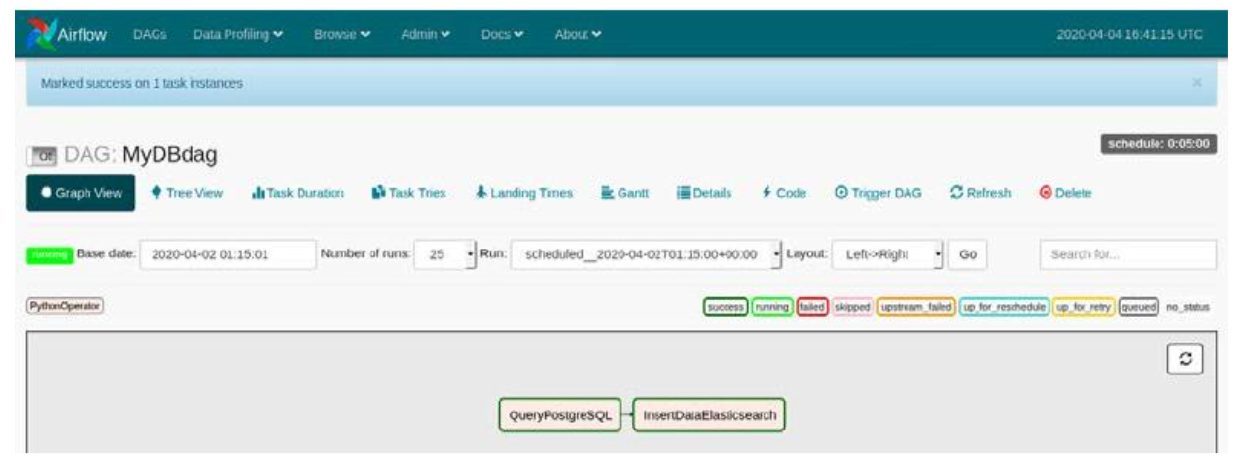

Le graphique acyclique dirigé (DAG) précédent semble très simple ; il ne s'agit que de deux tâches, et vous pouvez combiner les tâches en une seule fonction. Ce n'est pas une bonne idée. Dans la section 2, Déploiement de pipelines en production, vous apprendrez à modifier vos pipelines de données pour la production. Un élément clé des pipelines de production est que chaque tâche doit être atomique ; c'est-à-dire que chaque tâche devrait pouvoir se suffire à elle-même. Si vous aviez une seule fonction qui lisait une base de données et insérait les résultats, en cas d'échec, vous devez déterminer si la requête a échoué ou si l'insertion a échoué. Au fur et à mesure que vos tâches deviennent plus compliquées, le débogage demandera beaucoup plus de travail. La section suivante vous guidera dans la construction du pipeline de données

## Configuration du passe-partout Airflow

Chaque DAG aura un code standard standard pour le faire fonctionner dans Airfow. Vous importerez toujours les bibliothèques nécessaires, puis toutes les autres bibliothèques dont vous avez besoin pour vos tâches. Dans le bloc de code suivant, vous importez l'opérateur, le DAG et les bibliothèques de temps pour Airflow. Pour vos tâches, vous importez les bibliothèques pandas, psycopg2 et elasticsearch :



    import datetime as dt
    from datetime import timedelta

    from airflow import DAG
    from airflow.operators.bash_operator import BashOperator
    from airflow.operators.python_operator import PythonOperator

    import pandas as pd
    import psycopg2 as db
    from elasticsearch import Elasticsearch

Ensuite, vous spécifierez les arguments de votre DAG. N'oubliez pas que l'heure de début doit être en retard d'un jour si vous planifiez l'exécution quotidienne de la tâche :


    default_args = {
        'owner': 'paulcrickard',
        'start_date': dt.datetime(2020, 4, 2),
        'retries': 1,
        'retry_delay': dt.timedelta(minutes=5),
    }




Maintenant, vous pouvez transmettre les arguments au DAG, le nommer et définir l'intervalle d'exécution. Vous définirez également vos opérateurs ici. Dans cet exemple, vous allez créer deux opérateurs Python : un pour obtenir des données de PostgreSQL et un pour insérer des données dans Elasticsearch. La tâche getData sera en amont et la tâche insertData en aval, vous utiliserez donc l'opérateur >> bit shift pour spécifier ceci :



    with DAG('MyDBdag',
            default_args=default_args,
            schedule_interval=timedelta(minutes=5),      # '0 * * * *',
            ) as dag:

        getData = PythonOperator(task_id='QueryPostgreSQL',
                                    python_callable=queryPostgresql)
        
        insertData = PythonOperator(task_id='InsertDataElasticsearch',
                                    python_callable=insertElasticsearch)



    getData >> insertData


Enfin, vous définirez les tâches. Dans les opérateurs précédents, vous les avez nommés queryPostgresql et insertElasticsearch. Le code de ces tâches devrait vous sembler très familier ; il est presque identique au code des sections précédentes de ce chapitre.Pour interroger PostgreSQL, vous créez la connexion, exécutez la requête SQL à l'aide de la méthode pandas read_sql(), puis utilisez la méthode pandas to_csv() pour écrire les données dans disque:



    def queryPostgresql():
        conn_string="dbname='dataengineering' host='localhost' user='postgres' password='postgres'"
        conn=db.connect(conn_string)
        df=pd.read_sql("select name,city from users",conn)
        df.to_csv('postgresqldata.csv')
        print("-------Data Saved------")

  
Pour insérer les données dans Elasticsearch, vous créez l'objet Elasticsearch en vous connectant à localhost. Ensuite, lisez le CSV de la tâche précédente dans un DataFrame, parcourez le DataFrame, convertissez chaque ligne en JSON et insérez les données à l'aide de la méthode d'indexation :



    def insertElasticsearch():
        es = Elasticsearch() 
        df=pd.read_csv('postgresqldata.csv')
        for i,r in df.iterrows():
            doc=r.to_json()
            res=es.index(index="frompostgresql",doc_type="doc",body=doc)
            print(res)	


Vous disposez maintenant d'un pipeline de données complet dans Airflow. Dans la section suivante, vous l'exécuterez et afficherez les résultats.

## Exécution du DAG

Pour exécuter le DAG, vous devez copier votre code dans votre dossier $AIRFLOW_HOME/dags. Après avoir déplacé le fichier, vous pouvez exécuter les commandes suivantes :


    airflow webserver
    airflow scheduler


Une fois ces commandes terminées, accédez à http://localhost:8080 pour voir l'interface graphique Airflow. Sélectionnez MyDBdag, puis sélectionnez Tree View. Vous pouvez programmer cinq exécutions du DAG et cliquer sur GO. Au fur et à mesure de son exécution, vous devriez voir les résultats en dessous, comme illustré dans la capture d'écran suivante :

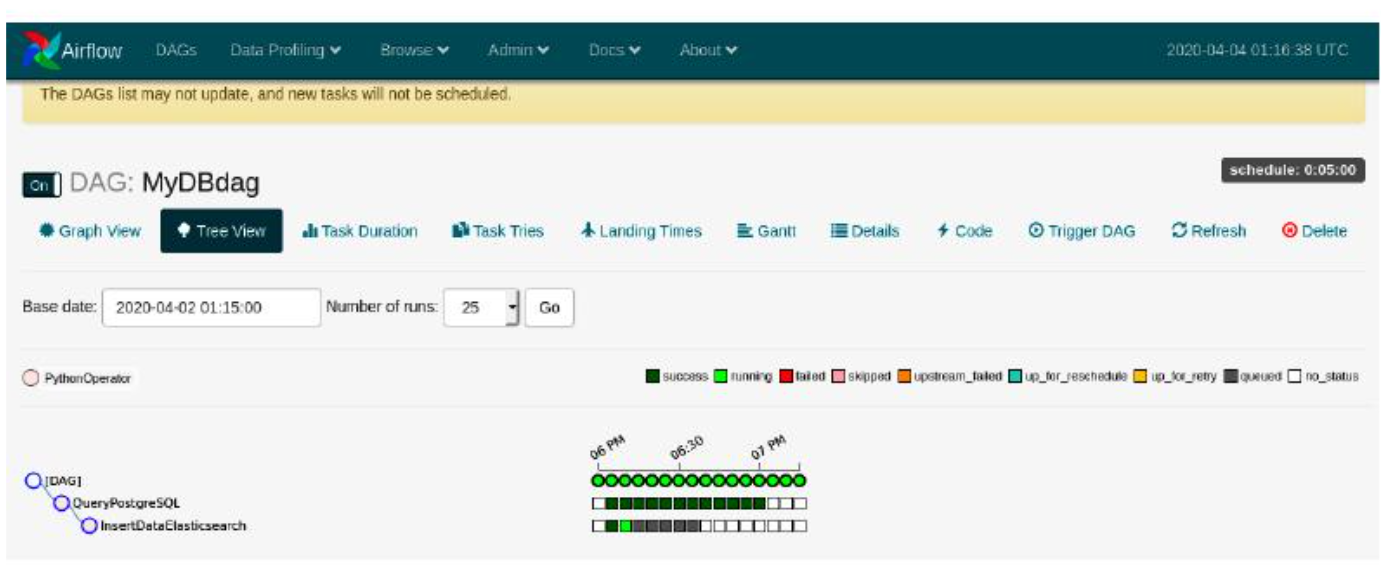

Pour vérifier que le pipeline de données a réussi, vous pouvez afficher les données dans Elasticsearch à l'aide de Kibana. Pour voir les résultats, accédez à Kibana à l'adresse http://localhost:5601. Vous devrez créer un nouvel index dans Kibana. Vous avez effectué cette tâche dans la section Insertion de données à l'aide d'assistants de ce chapitre. Mais pour récapituler, vous sélectionnerez Gestion dans Kibana en bas de la barre d'outils de gauche dans Kibana, puis créerez le modèle d'index en cliquant sur le bouton Créer un modèle d'index. Commencez à saisir le nom de l'index et Kibana le trouvera, puis cliquez sur Créer. Ensuite, vous pouvez accéder à l'onglet Découvrir de la barre d'outils et afficher les données.


Vous verrez qu'il existe des documents contenant uniquement des noms et des villes, comme spécifié dans votre tâche de pipeline de données. Une chose à noter est que nous avons maintenant plus de 2 000 enregistrements. Il n'y avait que 1 000 enregistrements dans la base de données PostgreSQL, alors que s'est-il passé ? Le pipeline de données s'est exécuté plusieurs fois et à chaque fois, il a inséré les enregistrements de PostgreSQL. Un deuxième locataire des pipelines de données est qu'ils doivent être idempotents. Cela signifie que peu importe combien de fois vous l'exécutez, les résultats sont les mêmes. Dans ce cas, ils ne le sont pas. Vous apprendrez comment résoudre ce problème dans la Section 2, Déploiement des pipelines en production, au Chapitre 7, Fonctionnalités d'un pipeline de production.